# Calculating rates of change from data
#### Marco Arieli Herrera-Valdez
##### Laboratory of computational physiology and quantitative imaging 
##### Facultad de Ciencias, Universidad Nacional Autónoma de México

Consider an experimental paradigm in which a variable $y$ is experimentally obtained and it varies as a function of $x$, which is manipulated experimentally. The lines below show how to calculate the rate of change of $y$ as a function of $x$. The role of experimental noise is illustrated.

In [1]:
import scipy as sc
import matplotlib.pylab as gr
%matplotlib inline

Now let us create a data set with some normally distributed noise that will represent data sets obtained experimentally from varying, for instance, the amount of $x$ and measuring the resulting $y$.

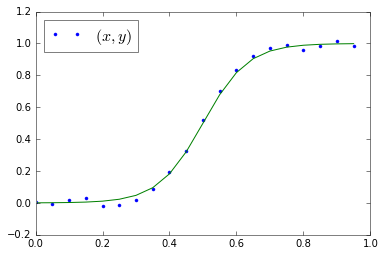

In [2]:
# x and noise
x= sc.arange(0,1, 0.05)
noiseAmp= 0.025;
noise = noiseAmp * sc.randn(len(x))
# Functional form for y
k= 15.0; a=0.5; 
y = 1/(1+ sc.exp(k*(a-x)))
yN = noise + 1/(1+ sc.exp(k*(a-x)))
#
gr.plot(x,yN,'b.',label=r"$(x,y)$")
gr.plot(x,y,'g')
gr.legend(loc="upper left",fontsize=16)

## Approximation for the derivative and inflection points
To analyze the rate of change of $y$ with respect to $x$ and examine the shape of the curve describing the graph of $y$ as a function of $x$, it is necesary to calculate approximations of the derivatives $\partial_x y$ and $\partial_x^2 y$. To do so, let us define two arrays in which we can store the calculated rates of change.

### The rate of change of $y$ with respect to $x$
The data representing the relationship between $x$ and $y$ is an array of points of the form $(x_i,y_i)$, $i\in \left\{0,...,n-1\right\}$. For a first approach, let $h_i= x_{i+1}-x_i$. Then the slopes $s_i$ of the secant lines at each pair of points can be approximated by letting
\begin{eqnarray}
\partial_x y \approx s_i 
&=& 
\frac{y_{i+1}-y_{i}}{x_{i+1}-x_{i}}
\end{eqnarray}


### Approximations for data sets with "large enough" samples
Let us build an approximation to the derivative by averaging the upper and lower slopes of the secant lines around each point. That is, averaging
\begin{eqnarray}
\partial_x y 
\approx& =& \frac{s_{i+1}+s_i}{2}
\\
&=&
\frac{1}{2}\left( \frac{y_{i+1}-y_{i}}{x_{i+1}-x_{i}} + \frac{y_i-y_{i-1}}{x_{i}-x_{i-1}} \right)
\end{eqnarray}


In [3]:
# Define a function to calculate the slopes of secant lines for the graph of y as a function of x
def secantSlope(x,y,side="left"):
    """
    Function to calculate the slopes of secant lines for the graph of y as a function of x

    """
    s = sc.zeros(len(y)) 
    if side=="left":
        s[1:] = (y[1:]-y[:-1])/(x[1:]-x[:-1])
        s[0] = (y[1]-y[0])/(x[1]-x[0])
    if side=="right":
        s[:-1] = (y[1:]-y[:-1])/(x[1:]-x[:-1])
        s[0] = (y[-1]-y[-2])/(x[-1]-x[-2])
    return s


Now use the function that calculates the slope of the secant line (defined above) and calculate different approximations for the derivatives.

In [4]:
# Setup the arrays for dy
sL = secantSlope(x,y,side="left")
sLN = secantSlope(x,yN,side="left")
sR = secantSlope(x,y,side="right")
sRN = secantSlope(x,yN,side="right")
# Central approximations for the derivatives
dy = (sL+sR)/2.0
dyN = (sLN+sRN)/2.0
print(dyN)

[-0.4428451   0.09587346  0.40108478 -0.37998158 -0.41757213  0.39568925
  0.94417285  1.78201519  2.4320911   3.25481393  3.7547781   3.12229179
  2.19186306  1.35289374  0.65172863 -0.08040229 -0.05949036  0.53381356
  0.05621862 -0.28248874]


Now let us illustrate the variations in the central approximation to $\partial_x y$ introduced by noise. The continuous curves illustrate the behaviour of the derivative in the absence of noise. The dashed curves show the behaviour of the derivative with noise. 

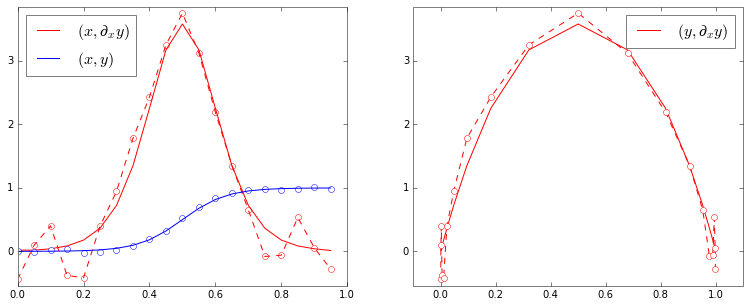

In [5]:
f= gr.figure(figsize=(13,5)); gr.ioff()
ax=list(); r=1; c=2;
ax.append(f.add_subplot(r,c,1))
ax.append(f.add_subplot(r,c,2))
ax[0].plot(x,dyN,'wo',markeredgecolor="r")
ax[0].plot(x,dyN,'r--')
ax[0].plot(x,dy,'r',label=r"$(x, \partial_x y)$")
ax[0].plot(x,yN,'wo',markeredgecolor="b")
ax[0].plot(x,y,'b',label=r"$(x,y)$")
ax[1].plot(y,dyN,'r--')
ax[1].plot(y,dy,'r',label=r"$(y,\partial_x y)$")
ax[1].plot(y,dyN,'wo',markeredgecolor="r")
ax[0].legend(fontsize=16,loc="upper left")
ax[1].legend(fontsize=16,loc="upper right"); 
ax[0].set_ylim(dyN.min()-0.1,0.1+dyN.max())
ax[1].set_ylim(dyN.min()-0.1,0.1+dyN.max())
ax[1].set_xlim(y.min()-0.1,0.1+y.max())
#ax[1].set_xlim(-0.1,0.1)
gr.ion(); gr.draw()

In [6]:
print(r"The maximum value of the derivative of y with respect to x is %g"%dyN.max())

The maximum value of the derivative of y with respect to x is 3.75478


Changing the noise amplitude yields different values for the maximum, which can vary widely. Change the noise amplitude to check this fact.

### The second derivative and the inflection points
The graph of $y$ as a function of $x$ seems to have an inflection point somewhere between its upper and lower branches, around the values where $y$ increases linearly. An inflection point could be found in that range by calculating an approximation to $\partial^y_x$, the second derivative of $y$ with respect to $x$, and finding the points where that second derivative is closer to zero. To do so, we calculate approximations to the second derivative by treating the slopes of the secant lines from the data as representative points for the derivative, and using such points to  calculate the slopes of secant lines. 

The inflection points for $y$ would be those points for which  
$$0=\partial^2_x y = \partial_x \left( \partial_x y \right). $$
That is, inflection points are such that the first derivative has a local maximum or a local minimum. 
For the data, the second-order slopes of the secant lines (slopes of secant lines from the slopes of secant lines) would almost never take the value of 0. However, we can try to estimate if there are values of $x$ for which the second-order slopes are close to zero. Another way to find inflection points, is to find the points at which the derivative has a maximum, or a minimum for the interval of interest.   

In [8]:
# Arrays for the second derivative ("noisy data" and representative function)
d2y = sc.arange(len(y))
d2yN = sc.arange(len(yN))
d2yN[1:]= (dyN[1:]- dyN[:-1])/(x[1:]-x[:-1])
d2y[1:]= (dy[1:]- dy[:-1])/(x[1:]-x[:-1])
print((dyN[1:]- dyN[:-1])/(x[1:]-x[:-1]))

[ 10.77437116   6.10422636 -15.62132719  -0.75181094  16.26522749
  10.96967211  16.75684673  13.00151814  16.45445656   9.99928341
 -12.64972618 -18.6085745  -16.77938638 -14.02330225 -14.64261846
   0.41823859  11.86607836  -9.55189875  -6.77414723]
